In [118]:
# TP Final ML

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


dataset = pd.read_csv('Current_Pub_Meta.csv')
dataset.head()


,Unnamed: 0,Name,Primary Attribute,Roles,Herald Picks,Herald Wins,Herald Win Rate,Guardian Picks,Guardian Wins,Guardian Win Rate,...,Legend Win Rate,Ancient Picks,Ancient Wins,Ancient Win Rate,Divine Picks,Divine Wins,Divine Win Rate,Immortal Picks,Immortal Wins,Immortal Win Rate
0,0,Abaddon,all,"Support, Carry, Durable",960,489,50.94,6628,3367,50.80,...,49.02,4264,2147,50.35,1804,897,49.72,534,268,50.19
1,1,Alchemist,str,"Carry, Support, Durable, Disabler, Initiator, ...",1086,501,46.13,6924,3157,45.60,...,48.54,4693,2297,48.95,2335,1138,48.74,1068,524,49.06
2,2,Ancient Apparition,int,"Support, Disabler, Nuker",1882,932,49.52,14270,7597,53.24,...,53.70,10979,5880,53.56,5160,2725,52.81,2079,1100,52.91
3,3,Anti-Mage,agi,"Carry, Escape, Nuker",3373,1729,51.26,23505,11859,50.45,...,49.49,13776,6664,48.37,5969,2876,48.18,2164,1034,47.78
4,4,Arc Warden,agi,"Carry, Escape, Nuker",1529,756,49.44,8287,4161,50.21,...,51.41,3445,1801,52.28,1569,834,53.15,563,310,55.06


La primera columna veo que no nos sirve para nada, podemos sacarla!

In [119]:
dataset = dataset.iloc[: , 1:]
dataset.head()

,Name,Primary Attribute,Roles,Herald Picks,Herald Wins,Herald Win Rate,Guardian Picks,Guardian Wins,Guardian Win Rate,Crusader Picks,...,Legend Win Rate,Ancient Picks,Ancient Wins,Ancient Win Rate,Divine Picks,Divine Wins,Divine Win Rate,Immortal Picks,Immortal Wins,Immortal Win Rate
0,Abaddon,all,"Support, Carry, Durable",960,489,50.94,6628,3367,50.80,15031,...,49.02,4264,2147,50.35,1804,897,49.72,534,268,50.19
1,Alchemist,str,"Carry, Support, Durable, Disabler, Initiator, ...",1086,501,46.13,6924,3157,45.60,14956,...,48.54,4693,2297,48.95,2335,1138,48.74,1068,524,49.06
2,Ancient Apparition,int,"Support, Disabler, Nuker",1882,932,49.52,14270,7597,53.24,34959,...,53.70,10979,5880,53.56,5160,2725,52.81,2079,1100,52.91
3,Anti-Mage,agi,"Carry, Escape, Nuker",3373,1729,51.26,23505,11859,50.45,53679,...,49.49,13776,6664,48.37,5969,2876,48.18,2164,1034,47.78
4,Arc Warden,agi,"Carry, Escape, Nuker",1529,756,49.44,8287,4161,50.21,15769,...,51.41,3445,1801,52.28,1569,834,53.15,563,310,55.06


Vemos que tenemos:
- nombre del héroe (no importa demasiado para el análisis pero nos permite identificarlo)
- atributo (interesante, hay 4 valores posibles: all, str, int y agi que sería universal, fuerza, inteligencia y agilidad); habría que pasarlo a una variable dummy...
- roles (vemos que habría que separarlo en variables dummy, cuántos tenemos únicos?)
- cantidad de partidas, ganadas y porcentaje de victoria dividido por rangos: heraldo, guardian, crusado, leyenda, ancestral, divino e inmortal; nos vamos a concentrar en Leyenda para unas primeras pruebas y ver que datos tenemos en este rango a ver si nos ayuda (ya que estamos trabados en el nivel Leyenda 😅)

Ahora pasamos a True o False la variable categórica. Podríamos eliminar una opción ya que en realidad necesitamos K - 1 para representar K valores, pero creemos que no es necesario... salvo que haya mucha complejidad.

In [120]:
attribute = dataset['Primary Attribute']

print(attribute)

dataset = pd.get_dummies(dataset, columns = ['Primary Attribute'])

dataset.head()

0      all
1      str
2      int
3      agi
4      agi
      ... 
119    all
120    all
121    int
122    str
123    int
Name: Primary Attribute, Length: 124, dtype: object


,Name,Roles,Herald Picks,Herald Wins,Herald Win Rate,Guardian Picks,Guardian Wins,Guardian Win Rate,Crusader Picks,Crusader Wins,...,Divine Picks,Divine Wins,Divine Win Rate,Immortal Picks,Immortal Wins,Immortal Win Rate,Primary Attribute_agi,Primary Attribute_all,Primary Attribute_int,Primary Attribute_str
0,Abaddon,"Support, Carry, Durable",960,489,50.94,6628,3367,50.80,15031,7493,...,1804,897,49.72,534,268,50.19,False,True,False,False
1,Alchemist,"Carry, Support, Durable, Disabler, Initiator, ...",1086,501,46.13,6924,3157,45.60,14956,6909,...,2335,1138,48.74,1068,524,49.06,False,False,False,True
2,Ancient Apparition,"Support, Disabler, Nuker",1882,932,49.52,14270,7597,53.24,34959,18865,...,5160,2725,52.81,2079,1100,52.91,False,False,True,False
3,Anti-Mage,"Carry, Escape, Nuker",3373,1729,51.26,23505,11859,50.45,53679,26738,...,5969,2876,48.18,2164,1034,47.78,True,False,False,False
4,Arc Warden,"Carry, Escape, Nuker",1529,756,49.44,8287,4161,50.21,15769,8128,...,1569,834,53.15,563,310,55.06,True,False,False,False


In [121]:
# Debemos también mover los diferentes Roles de un héroe a columnas, no nos sirve así. PEro no está en formato lista, sino que es un string con los roles separados por comas.

dataset['Roles'] = dataset['Roles'].str.replace(" ","")

roles = dataset['Roles']

print(roles)

dataset = pd.concat([dataset, dataset['Roles'].str.get_dummies(sep=',')], axis=1)

#dataset = pd.concat([pd.get_dummies(dataset, columns = ['Roles']), dataset['Roles'].str.get_dummies(sep=',')], axis=1)

dataset.head()

0                               Support,Carry,Durable
1      Carry,Support,Durable,Disabler,Initiator,Nuker
2                              Support,Disabler,Nuker
3                                  Carry,Escape,Nuker
4                                  Carry,Escape,Nuker
                            ...                      
119               Carry,Support,Disabler,Escape,Nuker
120                            Support,Disabler,Nuker
121                            Support,Nuker,Disabler
122          Carry,Support,Durable,Disabler,Initiator
123                                       Nuker,Carry
Name: Roles, Length: 124, dtype: object


,Name,Roles,Herald Picks,Herald Wins,Herald Win Rate,Guardian Picks,Guardian Wins,Guardian Win Rate,Crusader Picks,Crusader Wins,...,Primary Attribute_int,Primary Attribute_str,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,Abaddon,"Support,Carry,Durable",960,489,50.94,6628,3367,50.80,15031,7493,...,False,False,1,0,1,0,0,0,0,1
1,Alchemist,"Carry,Support,Durable,Disabler,Initiator,Nuker",1086,501,46.13,6924,3157,45.60,14956,6909,...,False,True,1,1,1,0,1,1,0,1
2,Ancient Apparition,"Support,Disabler,Nuker",1882,932,49.52,14270,7597,53.24,34959,18865,...,True,False,0,1,0,0,0,1,0,1
3,Anti-Mage,"Carry,Escape,Nuker",3373,1729,51.26,23505,11859,50.45,53679,26738,...,False,False,1,0,0,1,0,1,0,0
4,Arc Warden,"Carry,Escape,Nuker",1529,756,49.44,8287,4161,50.21,15769,8128,...,False,False,1,0,0,1,0,1,0,0


Tenemos un poco más limpio el dataset... vamos a ver que podemos encontrar, pero vamos a recortar el análisis a solo un rango (leyenda, que es un nivel intermedio) antes de mezclarlo con los demás porque es donde nosotros jugamos.

In [122]:
dataset.columns

Index(['Name', 'Roles', 'Herald Picks', 'Herald Wins', 'Herald Win Rate',
       'Guardian Picks', 'Guardian Wins', 'Guardian Win Rate',
       'Crusader Picks', 'Crusader Wins', 'Crusader Win Rate', 'Archon Picks',
       'Archon Wins', 'Archon Win Rate', 'Legend Picks', 'Legend Wins',
       'Legend Win Rate', 'Ancient Picks', 'Ancient Wins', 'Ancient Win Rate',
       'Divine Picks', 'Divine Wins', 'Divine Win Rate', 'Immortal Picks',
       'Immortal Wins', 'Immortal Win Rate', 'Primary Attribute_agi',
       'Primary Attribute_all', 'Primary Attribute_int',
       'Primary Attribute_str', 'Carry', 'Disabler', 'Durable', 'Escape',
       'Initiator', 'Nuker', 'Pusher', 'Support'],
      dtype='object')

In [123]:
# Borremos las columnas referidas a Heraldo, Guardian, Crusado, Arconte, Ancestral, Divino, Inmortal
try:
    dataset.drop('Herald Picks', inplace=True, axis=1)
    dataset.drop('Herald Wins', inplace=True, axis=1)
    dataset.drop('Herald Win Rate', inplace=True, axis=1)

    dataset.drop('Guardian Picks', inplace=True, axis=1)
    dataset.drop('Guardian Wins', inplace=True, axis=1)
    dataset.drop('Guardian Win Rate', inplace=True, axis=1)

    dataset.drop('Crusader Picks', inplace=True, axis=1)
    dataset.drop('Crusader Wins', inplace=True, axis=1)
    dataset.drop('Crusader Win Rate', inplace=True, axis=1)

    dataset.drop('Archon Picks', inplace=True, axis=1)
    dataset.drop('Archon Wins', inplace=True, axis=1)
    dataset.drop('Archon Win Rate', inplace=True, axis=1)

    dataset.drop('Ancient Picks', inplace=True, axis=1)
    dataset.drop('Ancient Wins', inplace=True, axis=1)
    dataset.drop('Ancient Win Rate', inplace=True, axis=1)

    dataset.drop('Divine Picks', inplace=True, axis=1)
    dataset.drop('Divine Wins', inplace=True, axis=1)
    dataset.drop('Divine Win Rate', inplace=True, axis=1)

    dataset.drop('Immortal Picks', inplace=True, axis=1)
    dataset.drop('Immortal Wins', inplace=True, axis=1)
    dataset.drop('Immortal Win Rate', inplace=True, axis=1)
except Exception as e:
    print(e)

dataset.columns

Index(['Name', 'Roles', 'Legend Picks', 'Legend Wins', 'Legend Win Rate',
       'Primary Attribute_agi', 'Primary Attribute_all',
       'Primary Attribute_int', 'Primary Attribute_str', 'Carry', 'Disabler',
       'Durable', 'Escape', 'Initiator', 'Nuker', 'Pusher', 'Support'],
      dtype='object')

Empezemos a probar... encontraremos alguna relación entre los héroes, sus características y su winrate? Esperemos que nos ayuden a tomar mejores decisiones respecto a los héroes.

De antemano no sabemos, pero suponemos que queremos encontrar alguna relación entre los atributos de héroes y sus características respecto a su winrate. Capaz nos podría ayudar algún método de clasificación? No tenemos un problema de regresión aquí.

In [124]:
# Veamos algo de la matriz de correlación entre variables

dataset.drop('Name', inplace=True, axis=1)
dataset.drop('Roles', inplace=True, axis=1)

cormat = dataset.corr()
round(cormat,2)

,Legend Picks,Legend Wins,Legend Win Rate,Primary Attribute_agi,Primary Attribute_all,Primary Attribute_int,Primary Attribute_str,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
Legend Picks,1.00,1.00,0.26,0.08,-0.21,0.13,0.00,-0.01,0.06,-0.16,-0.01,-0.05,0.11,-0.18,0.00
Legend Wins,1.00,1.00,0.32,0.08,-0.21,0.12,0.01,-0.01,0.06,-0.15,-0.02,-0.05,0.11,-0.17,0.01
Legend Win Rate,0.26,0.32,1.00,0.07,-0.15,0.04,0.04,-0.03,-0.01,-0.02,-0.07,-0.04,-0.07,0.05,0.12
Primary Attribute_agi,0.08,0.08,0.07,1.00,-0.33,-0.33,-0.33,0.42,-0.30,-0.16,0.24,-0.25,-0.25,0.12,-0.37
Primary Attribute_all,-0.21,-0.21,-0.15,-0.33,1.00,-0.33,-0.33,-0.29,0.04,-0.09,0.20,0.01,0.04,-0.01,0.17
Primary Attribute_int,0.13,0.12,0.04,-0.33,-0.33,1.00,-0.33,-0.18,0.09,-0.39,-0.22,-0.22,0.29,0.08,0.29
Primary Attribute_str,0.00,0.01,0.04,-0.33,-0.33,-0.33,1.00,0.05,0.17,0.64,-0.22,0.46,-0.08,-0.19,-0.10
Carry,-0.01,-0.01,-0.03,0.42,-0.29,-0.18,0.05,1.00,-0.25,0.16,0.06,-0.08,-0.27,0.17,-0.52
Disabler,0.06,0.06,-0.01,-0.30,0.04,0.09,0.17,-0.25,1.00,0.10,-0.11,0.45,0.11,-0.24,0.26
Durable,-0.16,-0.15,-0.02,-0.16,-0.09,-0.39,0.64,0.16,0.10,1.00,-0.24,0.27,-0.25,-0.10,-0.21


<Axes: >

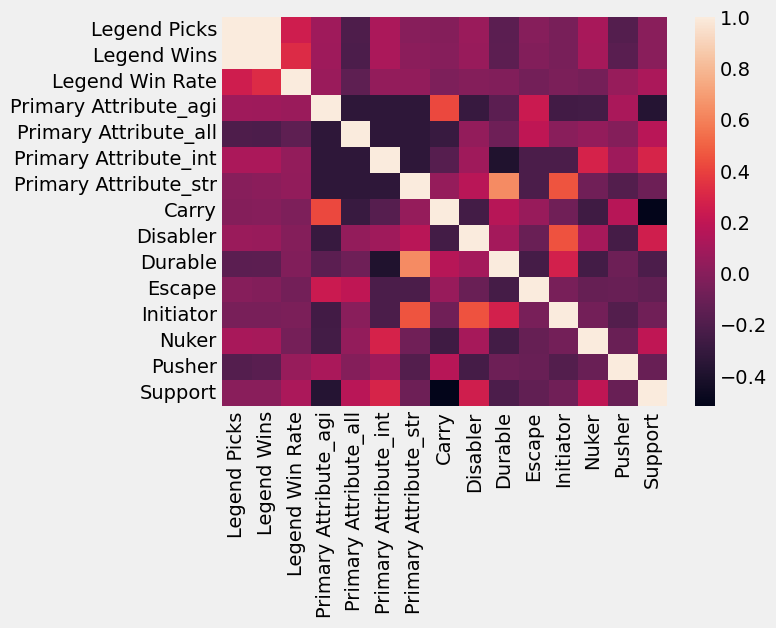

In [125]:
import seaborn as sns

sns.heatmap(cormat)

<Axes: >

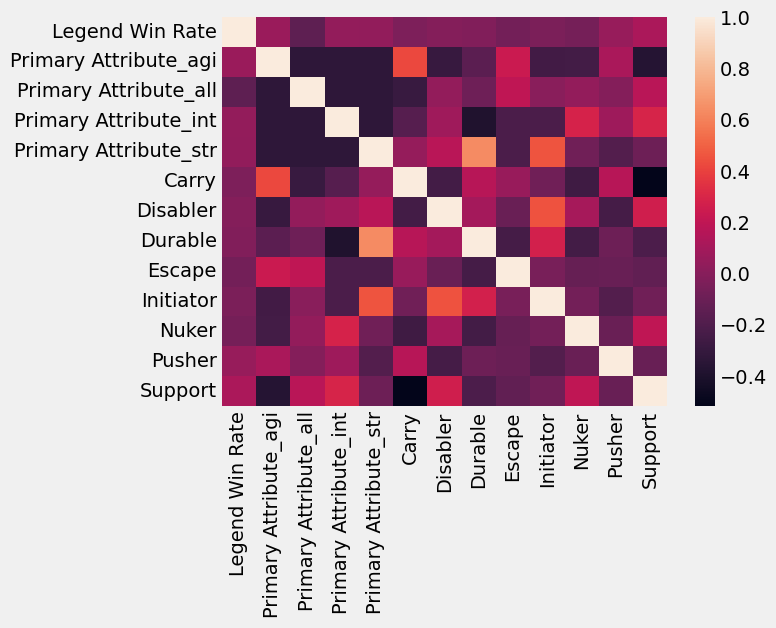

In [126]:
# Vemos que no tiene sentido mantener demasiado los picks y los wins, porque es un dato que se deriva directamente de Winrate. 
# Obviamente a mayor cantidad de picks, seguramente vaya a tener más wins (esto es una suposición, pero el matchmaking del dota trata de forzarte al 50% de winrate así que no vamos a detenernos ahora)

dataset.drop('Legend Picks', inplace=True, axis=1)
dataset.drop('Legend Wins', inplace=True, axis=1)

cormat = dataset.corr()
round(cormat,2)
sns.heatmap(cormat)

In [127]:
# Ya de entrada estamos notando algunas cosas: hay muchos valores que no tienen correlación pero hay algunos que rápidamente coinciden: Durable con héroe str (fuerza). Esto es porque
# los héroes de fuerza en general... tienen mucha vida!

# Lo mismo con Iniciador y disabler (que aplica algún bloqueo al enemigo): son para iniciar las peleas entonces si tienen esa característica (Iniciador), es muy probable que tengan
# habilidades para bloquear al enemigo

# Lo que nos conviene acá, es eliminar las variables cuya correlación es alta
# Guía: https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

upper = cormat.where(np.triu(np.ones(cormat.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
dataset.drop(to_drop, axis=1, inplace=True)

dataset.columns

Index(['Legend Win Rate', 'Primary Attribute_agi', 'Primary Attribute_all',
       'Primary Attribute_int', 'Primary Attribute_str', 'Carry', 'Disabler',
       'Durable', 'Escape', 'Initiator', 'Nuker', 'Pusher', 'Support'],
      dtype='object')

In [128]:
# Bueno... no borró nada, tal vez no haya tanta colinearidad.

Vamos a aplicar KMeans a ver si encontramos algo

In [129]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Vamos a normalizar todas las variables
scaled_features = scaler.fit_transform(dataset)

print(scaled_features)

[[-0.18026935 -0.57735027  1.73205081 ... -1.56347192 -0.55250625
   1.3021721 ]
 [-0.34993462 -0.57735027 -0.57735027 ...  0.63960215 -0.55250625
   1.3021721 ]
 [ 1.47396702 -0.57735027 -0.57735027 ...  0.63960215 -0.55250625
   1.3021721 ]
 ...
 [-0.3605387  -0.57735027 -0.57735027 ...  0.63960215 -0.55250625
   1.3021721 ]
 [ 0.70340393 -0.57735027 -0.57735027 ... -1.56347192 -0.55250625
   1.3021721 ]
 [ 0.12017957 -0.57735027 -0.57735027 ...  0.63960215 -0.55250625
  -0.76794765]]


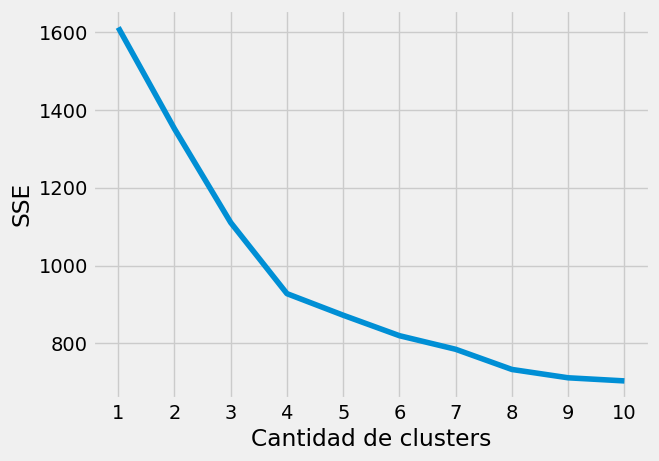

4

In [130]:
# No sabemos de antemano cuantos clusters hay, probemos ver qué número nos conviene con el método del codo
kmeans_kwargs = { "init": "random", "n_init": 'auto', "max_iter": 300, "random_state": 42,} # Podemos n_init auto ya que es una nueva opción de scikit-learn

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Cantidad de clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

In [131]:
# Nos dio 4 clusters, y se observa en el gráfico anterior en qué punto comienza a aplanarse
# Veamos a continuación los clusters en un gráfico

kmeans_kwargs = { "init": "random", "n_init": 'auto', "max_iter": 300, "random_state": 42,}
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)

# Para dibujar, vamos a mover la variable "objetivo" que es winrate (no la consideramos objetivo ya que estamos viendo que agrupamiento hay) al final
first_column = dataset.pop('Legend Win Rate')

dataset.insert(len(dataset.columns), 'Legend Win Rate', first_column)

y_kmeans = kmeans.fit_predict(dataset)





   Primary Attribute_agi  Primary Attribute_all  Primary Attribute_int  \
0                  False                   True                  False   
1                  False                  False                  False   
2                  False                  False                   True   
3                   True                  False                  False   
4                   True                  False                  False   

   Primary Attribute_str  Carry  Disabler  Durable  Escape  Initiator  Nuker  \
0                  False      1         0        1       0          0      0   
1                   True      1         1        1       0          1      1   
2                  False      0         1        0       0          0      1   
3                  False      1         0        0       1          0      1   
4                  False      1         0        0       1          0      1   

   Pusher  Support  Legend Win Rate  
0       0        1            49.02 

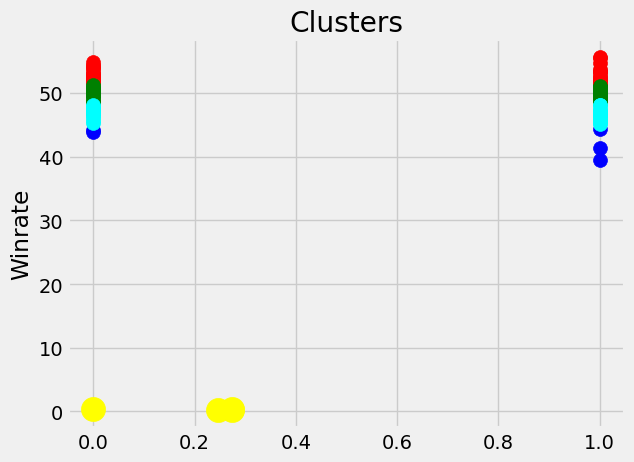

In [133]:
#filter rows of original data

X = dataset.iloc[:,:].values

print(dataset.head())

plt.scatter(X[y_kmeans==0, 4], X[y_kmeans==0, -1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 4], X[y_kmeans==1, -1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 4], X[y_kmeans==2, -1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 4], X[y_kmeans==3, -1], s=100, c='cyan', label ='Cluster 4')
 
#plotting the results:
print(X[y_kmeans==0])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Str')
plt.ylabel('Winrate')
plt.show()